In [1]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 32.9 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('ggplot')

In [3]:
import pickle

In [4]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

In [5]:
from sklearn.decomposition import PCA

#**Q1**

In [ ]:
pickle_file = open("/content/data.pickle",'rb')
data = pickle.load(pickle_file)

In [ ]:
data.shape

(1245, 2048)

In [ ]:
range_clusters = np.arange(2, 15, 1)

In [ ]:
kmeans_silhouette_score = []
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    predictions = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    score = silhouette_score(data, predictions)
    kmeans_silhouette_score.append(score)

In [ ]:
kmedoids_silhouette_score = []
for n_clusters in range_clusters:
    kmedoids = KMedoids(n_clusters=n_clusters)
    predictions = kmedoids.fit_predict(data)
    centers = kmedoids.cluster_centers_
    score = silhouette_score(data, predictions)
    kmedoids_silhouette_score.append(score)

In [ ]:
df = pd.DataFrame({'number_of_clusters': range_clusters, 'kmeans_silhouette_score': kmeans_silhouette_score, 'kmedoids_silhouette_score': kmedoids_silhouette_score})

In [ ]:
df

,number_of_clusters,kmeans_silhouette_score,kmedoids_silhouette_score
0,2,0.051739,0.047083
1,3,0.065232,0.055518
2,4,0.079925,0.062857
3,5,0.093360,0.054044
4,6,0.105077,0.053689
5,7,0.110287,0.045498
6,8,0.115421,0.042895
7,9,0.109172,0.071481
8,10,0.111743,0.086995
9,11,0.114761,0.089170


**Observation : Silhouette Score is low for all experiments. There is noise in data**

#**Q2**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ammaarahmad1999/Time_Series_Dataset/main/Live.csv")

In [ ]:
df.drop(columns = ['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], inplace = True)

In [ ]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df['status_type'])
df.drop(columns = ['status_type'], inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()
X = min_scaler.fit_transform(df)
df = pd.DataFrame(X, columns = df.columns)

In [ ]:
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [ ]:
pca = PCA(n_components='mle')
X = pca.fit_transform(X)
pca.n_components_

8

In [ ]:
from sklearn.metrics.cluster import rand_score

**Checking with number of clusters = 4 as in truth labels**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=100)
predictions = kmeans.fit_predict(X)
kmeans_silhouette_score = silhouette_score(X, predictions)
score = rand_score(Y, predictions)
print(f"Inertia = {kmeans.inertia_}, Silhouette Score = {kmeans_silhouette_score}, Rand Score = {score}")

Inertia = 61.889154980943644, Silhouette Score = 0.6443255543826424, Rand Score = 0.5889935597725747


In [ ]:
number_of_clusters = np.arange(2,12)
inertia = []
scores  = []
for n_clusters in number_of_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state=100)
  predictions = kmeans.fit_predict(X)
  inertia.append(kmeans.inertia_)
  scores.append(silhouette_score(X, predictions))

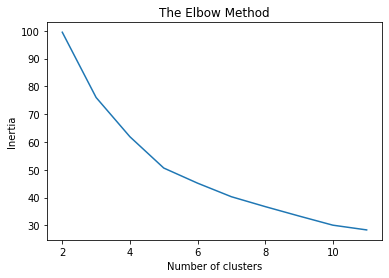

In [ ]:
plt.plot(number_of_clusters, inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

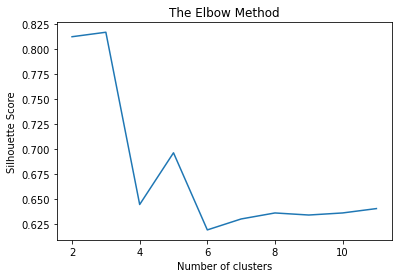

In [ ]:
plt.plot(number_of_clusters, scores)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Silhouette Score shows that number of clusters = 3 seems best fit as opposed to 4 ground truth labels**

#**Q3**

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/ammaarahmad1999/Time_Series_Dataset/main/nyc_taxi.csv")

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df['hours'] = df['timestamp'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)
df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)

In [9]:
df['categories'] = df['WeekDay']*2 + df['daylight']
a = df.loc[df['categories'] == 0, 'value']
b = df.loc[df['categories'] == 1, 'value']
c = df.loc[df['categories'] == 2, 'value']
d = df.loc[df['categories'] == 3, 'value']

In [10]:
df

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,categories
0,2014-07-01 00:00:00,10844,0,0,1,1,2
1,2014-07-01 00:30:00,8127,0,0,1,1,2
2,2014-07-01 01:00:00,6210,1,0,1,1,2
3,2014-07-01 01:30:00,4656,1,0,1,1,2
4,2014-07-01 02:00:00,3820,2,0,1,1,2
...,...,...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,1,5,0,1
10316,2015-01-31 22:00:00,25721,22,1,5,0,1
10317,2015-01-31 22:30:00,27309,22,1,5,0,1
10318,2015-01-31 23:00:00,26591,23,0,5,0,0


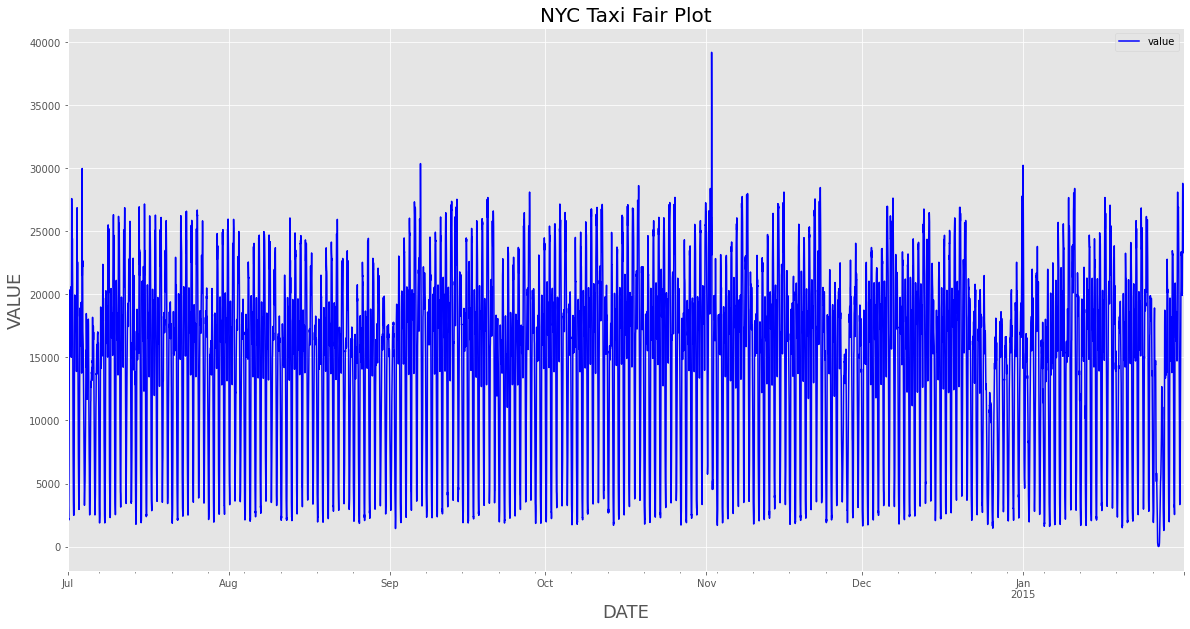

In [11]:
axl = df.plot(kind='line', x='timestamp', y='value', color='blue', figsize=(20, 10))
plt.title('NYC Taxi Fair Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('VALUE', size=18)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
X = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay','categories']]
min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X, columns = ['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay','categories'])

In [14]:
X

,value,hours,daylight,DayOfTheWeek,WeekDay,categories
0,-0.618745,-1.661325,-1.414214,-1.005865,0.629368,-0.097527
1,-1.010291,-1.661325,-1.414214,-1.005865,0.629368,-0.097527
2,-1.286549,-1.516862,-1.414214,-1.005865,0.629368,-0.097527
3,-1.510496,-1.516862,-1.414214,-1.005865,0.629368,-0.097527
4,-1.630971,-1.372399,-1.414214,-1.005865,0.629368,-0.097527
...,...,...,...,...,...,...
10315,1.373715,1.372399,0.707107,1.005865,-1.588896,-1.080419
10316,1.525175,1.516862,0.707107,1.005865,-1.588896,-1.080419
10317,1.754021,1.516862,0.707107,1.005865,-1.588896,-1.080419
10318,1.650550,1.661325,-1.414214,1.005865,-1.588896,-2.063310


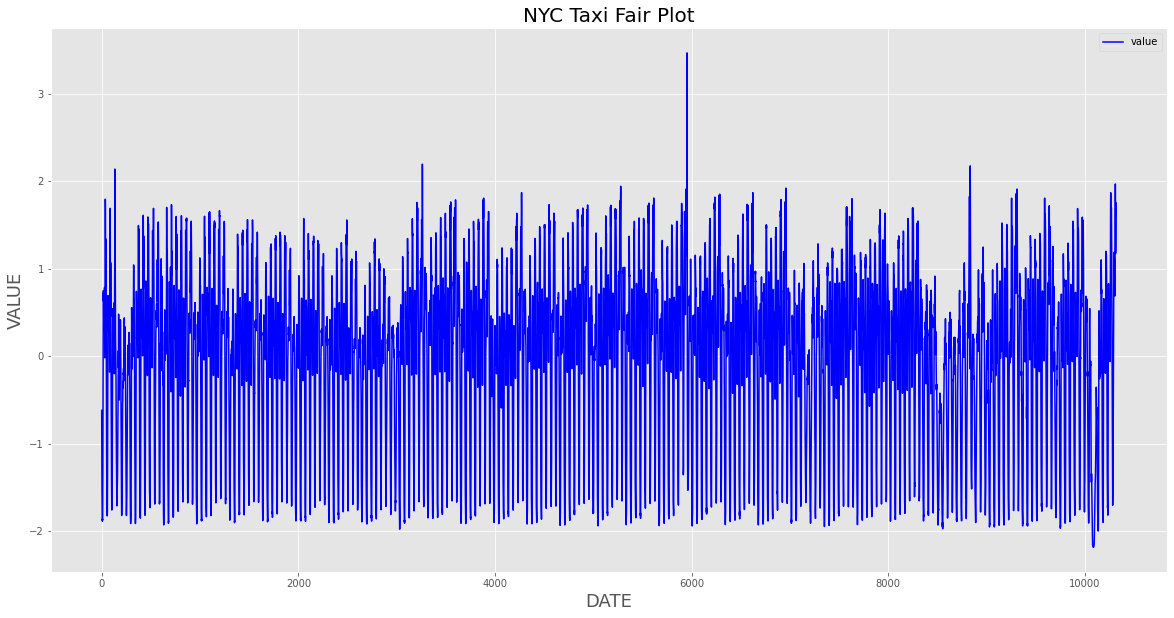

In [15]:
axl = X.plot(kind='line', y='value', color='blue', figsize=(20, 10))
plt.title('NYC Taxi Fair Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('VALUE', size=18)
plt.show()

In [17]:
X_reduced.shape

(10320, 5)

In [22]:
df.describe()

,value,hours,daylight,DayOfTheWeek,WeekDay,categories
count,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000
mean,15137.569380,11.500000,0.666667,3.000000,0.716279,2.099225
std,6939.495808,6.922522,0.471427,1.988434,0.450825,1.017456
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10262.000000,5.750000,0.000000,1.000000,0.000000,1.000000
50%,16778.000000,11.500000,1.000000,3.000000,1.000000,2.000000
75%,19838.750000,17.250000,1.000000,5.000000,1.000000,3.000000
max,39197.000000,23.000000,1.000000,6.000000,1.000000,3.000000


In [18]:
import seaborn as sns

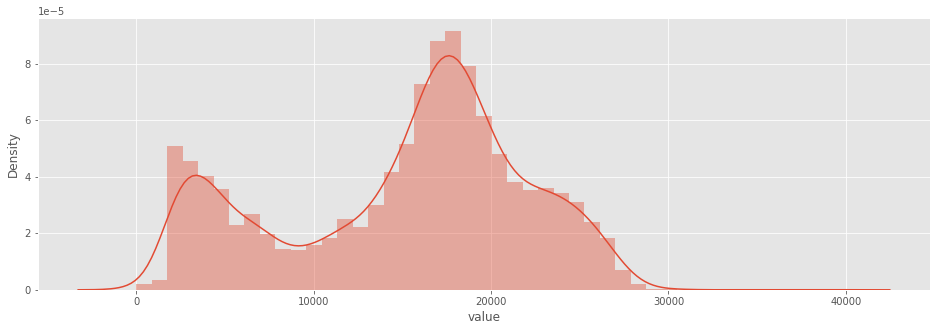

In [21]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
sns.distplot(df['value'])

In [24]:
mean = df['value'].mean()
q1 = df['value'].quantile(.25)
q3 = df['value'].quantile(.75)
IQR = q3 - q1
df['outlier'] = ((df['value']<q1-1.5*IQR) | (df['value']>q3+1.5*IQR)).astype(int)
df

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,categories,outlier
0,2014-07-01 00:00:00,10844,0,0,1,1,2,0
1,2014-07-01 00:30:00,8127,0,0,1,1,2,0
2,2014-07-01 01:00:00,6210,1,0,1,1,2,0
3,2014-07-01 01:30:00,4656,1,0,1,1,2,0
4,2014-07-01 02:00:00,3820,2,0,1,1,2,0
...,...,...,...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,1,5,0,1,0
10316,2015-01-31 22:00:00,25721,22,1,5,0,1,0
10317,2015-01-31 22:30:00,27309,22,1,5,0,1,0
10318,2015-01-31 23:00:00,26591,23,0,5,0,0,0


In [25]:
df[df['outlier'] == 1]

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,categories,outlier
5954,2014-11-02 01:00:00,39197,1,0,6,0,0,1
5955,2014-11-02 01:30:00,35212,1,0,6,0,0,1


In [26]:
pca = PCA(n_components='mle')
X_transform = pca.fit_transform(X)
X_inverse_transform = pca.inverse_transform(X_transform)
pca.n_components_

5

In [28]:
X

,value,hours,daylight,DayOfTheWeek,WeekDay,categories
0,-0.618745,-1.661325,-1.414214,-1.005865,0.629368,-0.097527
1,-1.010291,-1.661325,-1.414214,-1.005865,0.629368,-0.097527
2,-1.286549,-1.516862,-1.414214,-1.005865,0.629368,-0.097527
3,-1.510496,-1.516862,-1.414214,-1.005865,0.629368,-0.097527
4,-1.630971,-1.372399,-1.414214,-1.005865,0.629368,-0.097527
...,...,...,...,...,...,...
10315,1.373715,1.372399,0.707107,1.005865,-1.588896,-1.080419
10316,1.525175,1.516862,0.707107,1.005865,-1.588896,-1.080419
10317,1.754021,1.516862,0.707107,1.005865,-1.588896,-1.080419
10318,1.650550,1.661325,-1.414214,1.005865,-1.588896,-2.063310


In [29]:
X_inverse_transform = pd.DataFrame(X_inverse_transform, columns = ['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay','categories'])
X_inverse_transform

,value,hours,daylight,DayOfTheWeek,WeekDay,categories
0,-0.618745,-1.661325,-1.414214,-1.005865,0.629368,-0.097527
1,-1.010291,-1.661325,-1.414214,-1.005865,0.629368,-0.097527
2,-1.286549,-1.516862,-1.414214,-1.005865,0.629368,-0.097527
3,-1.510496,-1.516862,-1.414214,-1.005865,0.629368,-0.097527
4,-1.630971,-1.372399,-1.414214,-1.005865,0.629368,-0.097527
...,...,...,...,...,...,...
10315,1.373715,1.372399,0.707107,1.005865,-1.588896,-1.080419
10316,1.525175,1.516862,0.707107,1.005865,-1.588896,-1.080419
10317,1.754021,1.516862,0.707107,1.005865,-1.588896,-1.080419
10318,1.650550,1.661325,-1.414214,1.005865,-1.588896,-2.063310


In [30]:
MSE_score = ((X['value'] - X_inverse_transform['value'])**2)

In [32]:
X['MSE'] = MSE_score

In [33]:
MSE_max_scores = MSE_score.nlargest(3).index

In [34]:
MSE_max_scores

Int64Index([5954, 10078, 10079], dtype='int64')

In [36]:
X.loc[MSE_max_scores, :]

,value,hours,daylight,DayOfTheWeek,WeekDay,categories,MSE
5954,3.467197,-1.516862,-1.414214,1.508798,-1.588896,-2.063310,1.972152e-29
10078,-2.138670,1.661325,-1.414214,-1.508798,0.629368,-0.097527,1.597443e-29
10079,-2.154233,1.661325,-1.414214,-1.508798,0.629368,-0.097527,1.597443e-29


In [35]:
df.loc[MSE_max_scores, :]

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,categories,outlier
5954,2014-11-02 01:00:00,39197,1,0,6,0,0,1
10078,2015-01-26 23:00:00,297,23,0,0,1,2,0
10079,2015-01-26 23:30:00,189,23,0,0,1,2,0


#**Top 3 Outliers in the dataset**

#**Q4**

In [72]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix
import time 
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv")

In [74]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [75]:
df['hours'] = df['timestamp'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)
df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)

In [76]:
df['categories'] = df['WeekDay']*2 + df['daylight']
a = df.loc[df['categories'] == 0, 'value']
b = df.loc[df['categories'] == 1, 'value']
c = df.loc[df['categories'] == 2, 'value']
d = df.loc[df['categories'] == 3, 'value']

In [43]:
df

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,categories
0,2014-07-01 00:00:00,10844,0,0,1,1,2
1,2014-07-01 00:30:00,8127,0,0,1,1,2
2,2014-07-01 01:00:00,6210,1,0,1,1,2
3,2014-07-01 01:30:00,4656,1,0,1,1,2
4,2014-07-01 02:00:00,3820,2,0,1,1,2
...,...,...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,1,5,0,1
10316,2015-01-31 22:00:00,25721,22,1,5,0,1
10317,2015-01-31 22:30:00,27309,22,1,5,0,1
10318,2015-01-31 23:00:00,26591,23,0,5,0,0


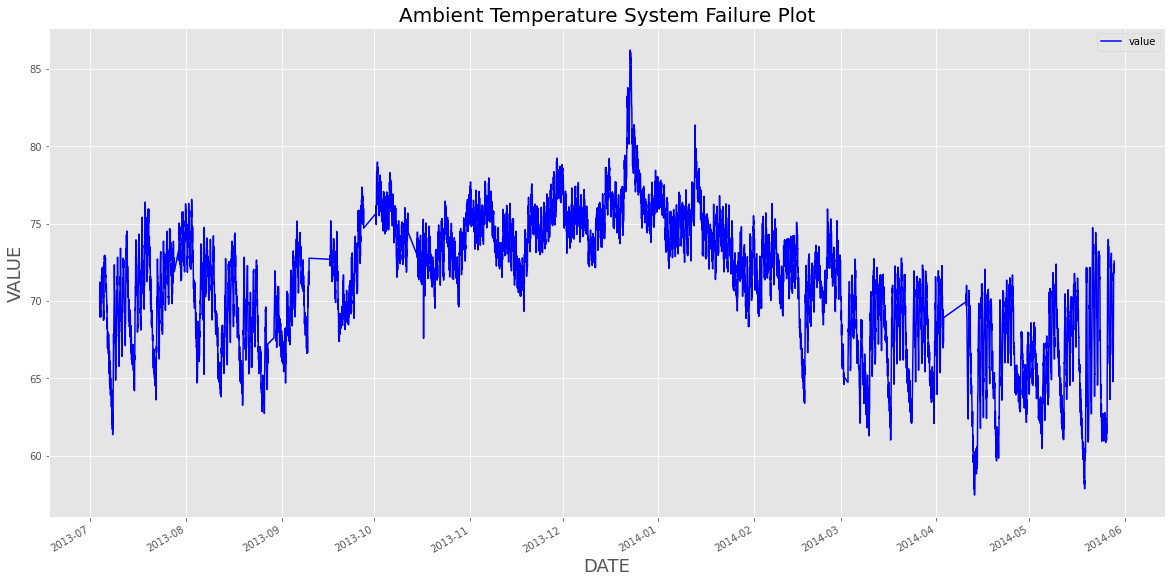

In [78]:
axl = df.plot(kind='line', x='timestamp', y='value', color='blue', figsize=(20, 10))
plt.title('Ambient Temperature System Failure Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('VALUE', size=18)
plt.show()

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [80]:
X = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay','categories']]
min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)

In [82]:
# important parameters
prediction_time = 1 
testdatasize = 1000
unroll_length = 30
testdatacut = testdatasize + unroll_length  + 1

#train data
x_train = X[0:-prediction_time-testdatacut].values
y_train = X[prediction_time:-testdatacut  ][0].values

# test data
x_test = X[0-testdatacut:-prediction_time].values
y_test = X[prediction_time-testdatacut:  ][0].values

In [83]:
print(x_train[0])
print(x_train[1])
print(x_train[2])
print(x_train[3])
print(x_train[4])

[-0.32058581 -1.66153683 -1.41479759  0.00576899  0.62131999 -0.10824848]
[-0.00522828 -1.51717197 -1.41479759  0.00576899  0.62131999 -0.10824848]
[-0.08585098 -1.37280711 -1.41479759  0.00576899  0.62131999 -0.10824848]
[-0.53753615 -1.22844225 -1.41479759  0.00576899  0.62131999 -0.10824848]
[-0.46121534 -1.08407739 -1.41479759  0.00576899  0.62131999 -0.10824848]


In [84]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])
print(y_train[4])

-0.005228281827374663
-0.08585097833638963
-0.5375361520119046
-0.4612153358440506
-0.27817435608313446


**# size of train and test data set**

In [85]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6235, 6)
(6235,)
(1030, 6)
(1030,)


**# windowing**

Window size = 30

In [86]:
#windowing
def unroll(data,sequence_length=24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

# adapt the datasets for the sequence data shape
x_train = unroll(x_train,unroll_length)
x_test  = unroll(x_test,unroll_length)
y_train = y_train[-x_train.shape[0]:]
y_test  = y_test[-x_test.shape[0]:]

**# shape of data**

In [87]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (6205, 30, 6)
y_train (6205,)
x_test (1000, 30, 6)
y_test (1000,)


# LSTM model




In [88]:
model1 = Sequential()
model1.add(LSTM(30,input_dim=x_train.shape[-1],return_sequences=True))
model1.add(Dropout(0.5))
model1.add(LSTM(30,return_sequences=False))
model1.add(Dropout(0.5))
model1.add(Dense(units=1))
model1.add(Activation('linear'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 30)          4440      
                                                                 
 dropout_2 (Dropout)         (None, None, 30)          0         
                                                                 
 lstm_3 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 11,791
Trainable params: 11,791
Non-trai

**# compile the model**

In [89]:
start = time.time()
model1.compile(loss='mse', optimizer='adam')
print('compilation time : {}'.format(time.time() - start))

compilation time : 0.008654356002807617


In [90]:
model1.fit(x_train, y_train, batch_size=1024, epochs=20, validation_split=0.1)

Epoch 1/20
6/6 [==============================] - 7s 357ms/step - loss: 0.6939 - val_loss: 1.3921
Epoch 2/20
6/6 [==============================] - 1s 205ms/step - loss: 0.4793 - val_loss: 1.1910
Epoch 3/20
6/6 [==============================] - 1s 205ms/step - loss: 0.3252 - val_loss: 0.9432
Epoch 4/20
6/6 [==============================] - 1s 210ms/step - loss: 0.2389 - val_loss: 0.6556
Epoch 5/20
6/6 [==============================] - 1s 202ms/step - loss: 0.1906 - val_loss: 0.4573
Epoch 6/20
6/6 [==============================] - 1s 204ms/step - loss: 0.1662 - val_loss: 0.3452
Epoch 7/20
6/6 [==============================] - 1s 205ms/step - loss: 0.1487 - val_loss: 0.2822
Epoch 8/20
6/6 [==============================] - 1s 204ms/step - loss: 0.1343 - val_loss: 0.2561
Epoch 9/20
6/6 [==============================] - 1s 205ms/step - loss: 0.1320 - val_loss: 0.2274
Epoch 10/20
6/6 [==============================] - 1s 221ms/step - loss: 0.1251 - val_loss: 0.1986
Epoch 11/20
6/6 [==

# Predict model on train and test data 

 **- Difference between prediction and test data**

In [91]:
loaded_model = model1
diff=[]
p = loaded_model.predict(x_test)
q = loaded_model.predict(x_train)
for u in range(len(y_test)):
    pr = p[u][0]
    diff.append(abs(y_test[u]- pr))

**# Plot the prediction and the reality (for the test data)**

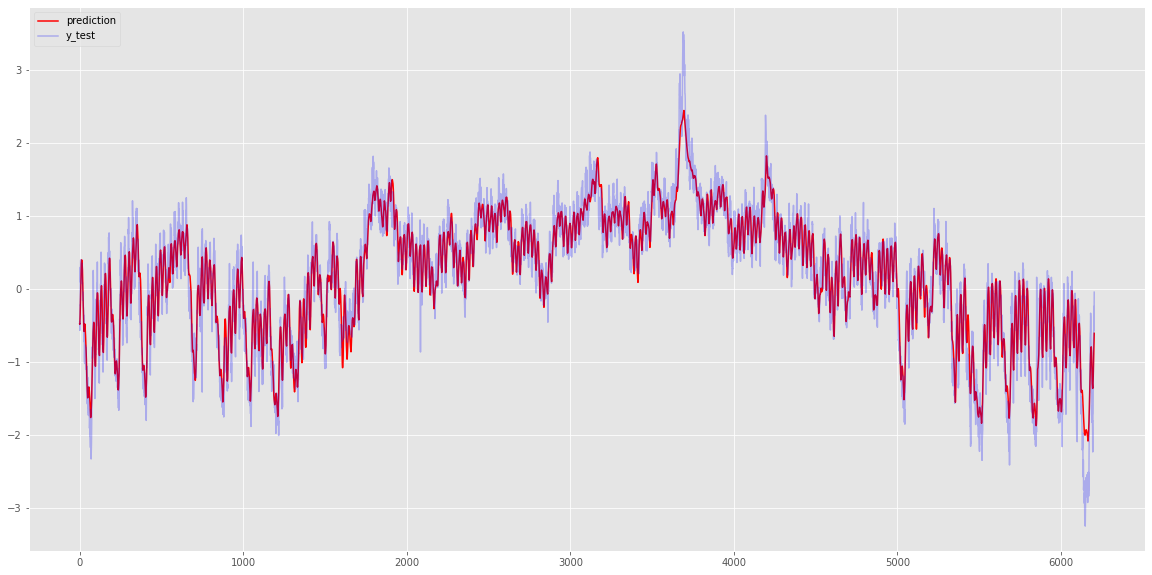

In [92]:
 #plot the prediction and the reality (for the test data)
fig, axs = plt.subplots(figsize = (20,10))
axs.plot(q,color='red', label='prediction')
axs.plot(y_train,color='blue',alpha = 0.25, label='y_test')
plt.legend(loc='upper left')
plt.show()

In [93]:
#Pick the most distant prediction/reality data points as anomalies
outlier=0.01
diff = pd.Series(diff)
number_of_outliers = int(outlier*len(diff))
threshold = diff.nlargest(number_of_outliers).min()
#Data with anomaly label
test = (diff >= threshold).astype(int)
pred=pd.DataFrame({'B' : test,'C' : y_test,'A': df.iloc[-1001:-1,6:7].values.flatten()})
#pred.append(test, ignore_index='True')

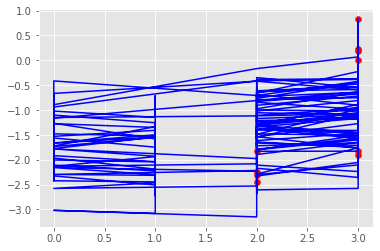

In [94]:
fig, ax = plt.subplots()

a = pred.loc[pred['B'] == 1, ['A', 'C']] #anomaly

ax.plot(pred['A'], pred['C'], color='blue')
ax.scatter(a['A'],a['C'], color='red')
plt.show()

#**Conclusion Red Scatter Plots are the anomalies**